In [10]:
import pandas as pd

# Load the Excel file
file_path = '/Users/macpro/Downloads/Customer Survey Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure and the type of data it contains
data.head()


,Address,Name,Service Date,Person Reference,Email Address,Postcode,Survey ID,Survey Date,Unnamed: 8,Service Type Alias,...,Contractor Name,Household Occupants,Local Authority,No. of Children,Property Type,Region,Tenure Group,Tenure Type,Overriding Emotion,Channel
0,Address 1,Customer 1,2023-09-06,520406.0,Customer@email.com,NG12,93558454,2023-09-17 10:45:08,NaN,Planned,...,C.H. BUILDER & SON LIMITED,1,RUSHCLIFFE BOROUGH COUNCIL,NOT SUPPLIED,HOUSE,M,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,NaN,Online
1,Address 2,Customer 2,2023-09-06,441019.0,Customer@email.com,NG12,93558455,2023-09-06 17:38:44,NaN,Planned,...,C.H. BUILDER & SON LIMITED,1,RUSHCLIFFE BOROUGH COUNCIL,NOT SUPPLIED,BUNGALOW,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
2,Address 3,Customer 3,2023-09-08,440483.0,Customer@email.com,NG6,93591459,2023-09-12 11:35:17,NaN,Planned,...,C.H. BUILDER & SON LIMITED,1,NOTTINGHAM CITY COUNCIL,NOT SUPPLIED,HOUSE,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
3,Address 4,Customer 4,2023-09-12,438466.0,Customer@email.com,SW4,93666838,2023-09-12 11:35:41,NaN,Planned,...,BG PUBLIC LIMITED COMPANY,1,LAMBETH COUNCIL,NOT SUPPLIED,FLAT,SOUTH,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
4,Address 5,Customer 5,2023-09-13,406506.0,NaN,DE23,93690674,2023-09-14 09:49:55,NaN,Planned,...,P LIMITED,1,DERBY CITY COUNCIL,NOT SUPPLIED,FLAT,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone


Here's a snapshot of the data from the customer surveys:

Address: Location of the service provided.
Name: Customer's name.
Service Date: Date when the service was provided.
Person Reference: Unique identifier for each customer.
Email Address: Customer's email address.
Postcode: Postal code of the service location.
Survey ID: Unique identifier for each survey response.
Survey Date: Date when the survey was completed.
Service Type Alias: Type of service provided (e.g., Planned).
Contractor Name: Name of the contractor who provided the service.
Household Occupants: Number of people living in the household.
Local Authority: Local government authority for the area.
No. of Children: Number of children in the household.
Property Type: Type of property (e.g., House, Bungalow).
Region: Region where the service was provided.
Tenure Group: Classification of tenure.
Tenure Type: Detailed tenure classification.
Overriding Emotion: Customer's emotional response to the service.
Channel: How the survey was completed (e.g., Online, Telephone).
The dataset includes a variety of demographic, service-related, and feedback data points, which are excellent for analyzing customer satisfaction and service effectiveness.

**The next steps are:**

**Exploring Data:** Assess the completeness and distribution of key fields.
**Cleaning Data:** Handle missing values and correct any inconsistencies.
**Analyzing Trends:** Focus on key variables that might influence customer satisfaction like service type, emotions, and contractor performance.
**Visualizing Data:** Create charts and graphs to visualize the trends and patterns in the data.

In [11]:
# Getting the summary information about the dataset, including data types and missing values
data_info = data.info()
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 38 columns):
 #   Column                                                                                                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                        --------------  -----         
 0   Address                                                                                                                                                                                                       91 non-null     object        
 1   Name                                                                                                                                                                  

Address                                                                      8
Name                                                                         8
Person Reference                                                             8
Email Address                                                               19
Postcode                                                                     8
Unnamed: 8                                                                  99
(11) Why do you say this?                                                    9
(12) What could MTVH do to improve the way they carry out planned works?    18
Overriding Emotion                                                           4
dtype: int64

Missing Values: Several columns have missing values, with significant gaps in the 'Email Address' and 'What could MTVH do to improve the way they carry out planned works?' fields. The column 'Unnamed: 8' is entirely empty and should likely be removed.

Data Types: Most fields are correctly typed. However, we need to check if all numeric and datetime fields align with their expected formats once missing values are addressed.
Specific Columns with Missing Data: Address, Name, Person Reference, Email Address, and Postcode each have 8 missing entries.
Overriding Emotion and a few survey-specific questions have a few missing entries as well.

Actions to Clean the Data:
Remove Unused Columns: Drop 'Unnamed: 8' as it contains no useful data.
Address Missing Values: Depending on the importance of each column for our analysis, we might fill in missing values or drop rows/columns where necessary. For non-critical text data like 'Email Address', we might leave them as is or fill with a placeholder if needed for certain analyses.


**Cleaning Steps Implementation**
Let's start by cleaning the dataset based on the actions outlined. We'll remove the completely empty column and then reassess the handling of other missing values based on the intended analysis. 

In [12]:
# Removing the completely empty column 'Unnamed: 8'
data_cleaned = data.drop(columns=['Unnamed: 8'])

# Display updated info and the first few rows to confirm changes
data_cleaned.info()
data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                        --------------  -----         
 0   Address                                                                                                                                                                                                       91 non-null     object        
 1   Name                                                                                                                                                                  

,Address,Name,Service Date,Person Reference,Email Address,Postcode,Survey ID,Survey Date,Service Type Alias,(1) How satisfied or dissatisfied are you with the products and choices that you were offered?,...,Contractor Name,Household Occupants,Local Authority,No. of Children,Property Type,Region,Tenure Group,Tenure Type,Overriding Emotion,Channel
0,Address 1,Customer 1,2023-09-06,520406.0,Customer@email.com,NG12,93558454,2023-09-17 10:45:08,Planned,Fairly satisfied,...,C.H. BUILDER & SON LIMITED,1,RUSHCLIFFE BOROUGH COUNCIL,NOT SUPPLIED,HOUSE,M,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,NaN,Online
1,Address 2,Customer 2,2023-09-06,441019.0,Customer@email.com,NG12,93558455,2023-09-06 17:38:44,Planned,Very satisfied,...,C.H. BUILDER & SON LIMITED,1,RUSHCLIFFE BOROUGH COUNCIL,NOT SUPPLIED,BUNGALOW,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
2,Address 3,Customer 3,2023-09-08,440483.0,Customer@email.com,NG6,93591459,2023-09-12 11:35:17,Planned,Fairly satisfied,...,C.H. BUILDER & SON LIMITED,1,NOTTINGHAM CITY COUNCIL,NOT SUPPLIED,HOUSE,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
3,Address 4,Customer 4,2023-09-12,438466.0,Customer@email.com,SW4,93666838,2023-09-12 11:35:41,Planned,Neither satisfied nor dissatisfied,...,BG PUBLIC LIMITED COMPANY,1,LAMBETH COUNCIL,NOT SUPPLIED,FLAT,SOUTH,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone
4,Address 5,Customer 5,2023-09-13,406506.0,NaN,DE23,93690674,2023-09-14 09:49:55,Planned,Very satisfied,...,P LIMITED,1,DERBY CITY COUNCIL,NOT SUPPLIED,FLAT,MIDLANDS,GENERAL NEEDS COMBINED,GEN NEEDS DIRECTLY MNGD,JOY,Telephone


In [13]:
# Fill missing values in 'Overriding Emotion' with "Unknown"
data_cleaned['Overriding Emotion'] = data_cleaned['Overriding Emotion'].fillna('Unknown')

# Display the updated counts of unique values in 'Overriding Emotion' to confirm changes
data_cleaned['Overriding Emotion'].value_counts()


JOY        62
SADNESS    24
Unknown     4
ANGER       4
FEAR        3
DISGUST     2
Name: Overriding Emotion, dtype: int64

In [14]:
# Filter columns that contain survey questions and summarize their missing values
survey_questions = data_cleaned.columns[data_cleaned.columns.str.contains("What could MTVH do to improve|Why do you say this?")]
data_cleaned[survey_questions].isnull().sum()


(11) Why do you say this?                                                    9
(12) What could MTVH do to improve the way they carry out planned works?    18
dtype: int64

In [15]:
# Fill missing values for the specific survey questions with "No response"
data_cleaned['(11) Why do you say this?'] = data_cleaned['(11) Why do you say this?'].fillna('No response')
data_cleaned['(12) What could MTVH do to improve the way they carry out planned works?'] = data_cleaned['(12) What could MTVH do to improve the way they carry out planned works?'].fillna('No response')

# Confirm that there are no more missing values in these columns
data_cleaned[survey_questions].isnull().sum()


(11) Why do you say this?                                                   0
(12) What could MTVH do to improve the way they carry out planned works?    0
dtype: int64

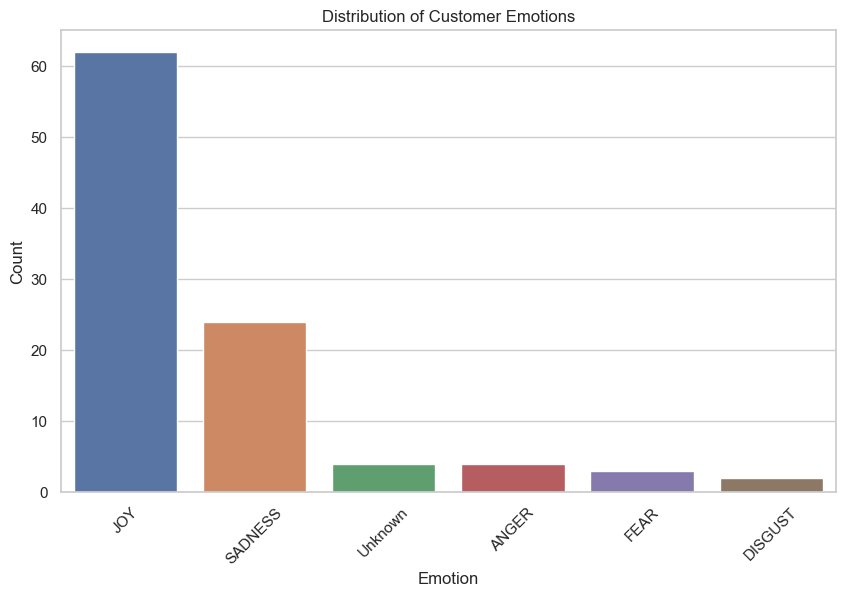

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the distribution of customer emotions
plt.figure(figsize=(10, 6))
emotion_count_plot = sns.countplot(data=data_cleaned, x='Overriding Emotion', order=data_cleaned['Overriding Emotion'].value_counts().index)
plt.title('Distribution of Customer Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Here's the visualization of the distribution of customer emotions from the survey data. The plot shows that the majority of responses are positive (Joy), followed by neutral and negative emotions like Sadness, Anger, Fear, and Disgust. This could be a key point in your presentation, highlighting areas where customer service is performing well and areas for improvement.

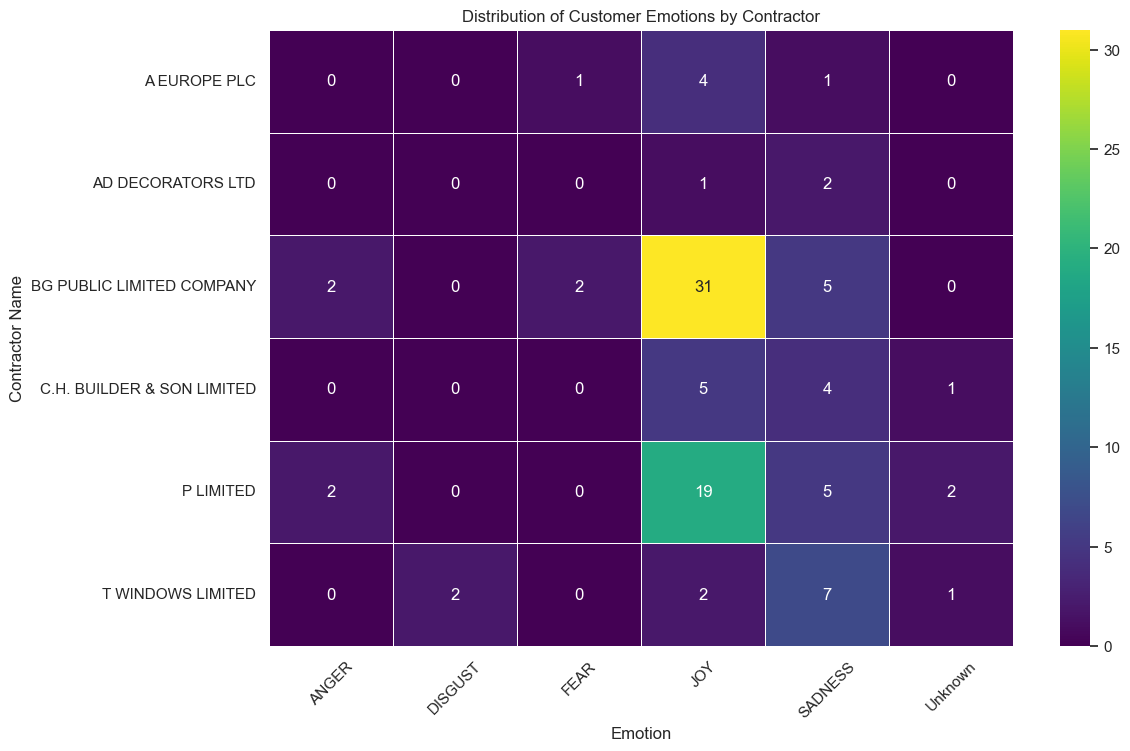

In [17]:
# Create a cross-tabulation of contractor names and overriding emotions
contractor_emotion_ct = pd.crosstab(data_cleaned['Contractor Name'], data_cleaned['Overriding Emotion'])

# Plotting the distribution of emotions for each contractor
plt.figure(figsize=(12, 8))
sns.heatmap(contractor_emotion_ct, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Distribution of Customer Emotions by Contractor')
plt.xlabel('Emotion')
plt.ylabel('Contractor Name')
plt.xticks(rotation=45)
plt.show()


In [18]:
from collections import Counter

# Extracting the feedback on what could be improved
improvement_feedback = data_cleaned['(12) What could MTVH do to improve the way they carry out planned works?']

# Counting the frequency of each response, ignoring 'No response' for more meaningful insights
feedback_counter = Counter([response for response in improvement_feedback if response != 'No response'])

# Displaying the most common feedback suggestions
most_common_feedback = feedback_counter.most_common(10)
most_common_feedback


[('Everything I have experienced has been excellent.', 1),
 ('Now I am waiting till October till they come to check and measure the kitchen, I still need the back doors and the windows that they promised but nothing has been done about it yet.',
  1),
 ('I am quite happy with what they have done.', 1),
 ('Nothing. It was on time, they came and did the work.', 1),
 ('Nothing comes to mind.', 1),
 ('They could provide  better communication  with the tenants, a lot of times the workers came with no materials, a lot of them did not know what the right hand was doing and what the left hand was doing. The contractors  should come to see the client to make sure they have the right materials before the work is done and see what work is going to be carried out.',
  1),
 ('Communication was poor and workmen could not speak English as they did not understand so we ended up with the wrong',
  1),
 ("No, I don't think so", 1),
 ('Some people when they came, they say they have come to fix flat 3, fl